## Results of the simulation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
import pandas as pd

plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.serif'] = ['Liberation Serif'] + plt.rcParams['font.serif']
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=[7,7]

In [4]:
file_name = "result_100000.txt"

file = open(file_name, 'r')

N_part = int(file.readline()) # read the first line where is written the number of particles
dim = file.readline()
t_0 = file.readline() # read the third line where is written the initial time

file.seek(0) # go back to the beginning of the file

N_lines = len(file.readlines())

print('N_part : ', N_part)
print('dim : ', dim)
print('initial time : ', t_0)
print('N_lines: ', N_lines)

N_part :  100000
dim :   3

initial time :    0.0000000E+00

N_lines:  15600156


In [8]:
N_lines_snap = 3+N_part*3
N_snap = N_lines / N_lines_snap # determine the number of snapshots

print('N snapshot: ', N_snap)

N snapshot:  52.0


In [5]:
data = pd.read_csv(file_name, names=list(range(7)), sep = ' ')

def dati (data, N):
    
    x = []
    y = []
    z = []
    
    start = N + 3
    step  = N * 3 + 3
    
    a = (np.array([data.iloc[i::step,:].copy() for i in range(start,start+N)]))
    for j in range(len(a)):
        temp = np.array([a[j][i][~np.isnan(a[j][i])] for i in range(len(a[j]))])
        x.append(temp[:,0])
        y.append(temp[:,1])
        z.append(temp[:,2])
    
    r = np.array([(x[i]**2+y[i]**2+z[i]**2)**0.5 for i in range(N)])
    
    t = (np.array(data.iloc[2::step,:].copy()))[:,2]
    
    return x,y,z,r,t

x,y,z,r,t=dati(data, N_part)

In [6]:
index=np.array(range(N_part))
index=index[::100]

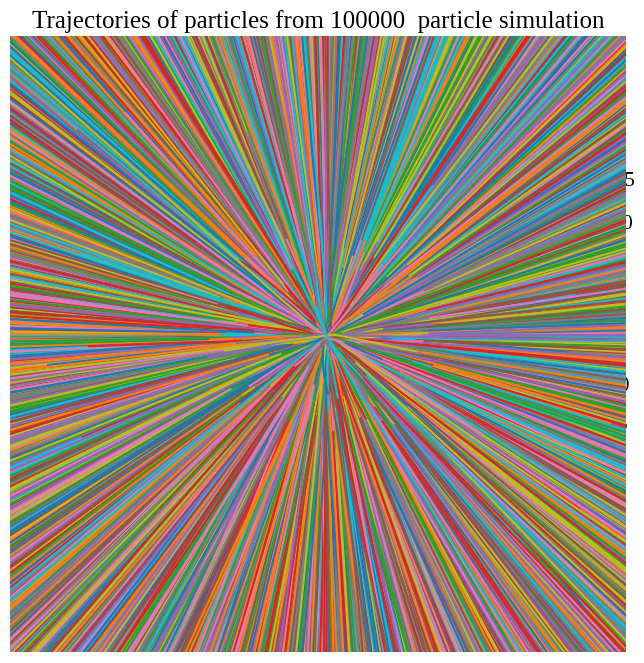

In [86]:
from mpl_toolkits import mplot3d

%matplotlib inline

l=15


fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection = '3d')

for i in range(N_part):
    ax.plot3D(x[i], y[i], z[i])

ax.axes.set_xlim3d(left=-l, right=l) 
ax.axes.set_ylim3d(bottom=-l, top=l) 
ax.axes.set_zlim3d(bottom=-l, top=l)
plt.title("Trajectories of particles from %d  particle simulation" %N_part)
#plt.savefig("trajectory_100", format='pdf')
plt.show()

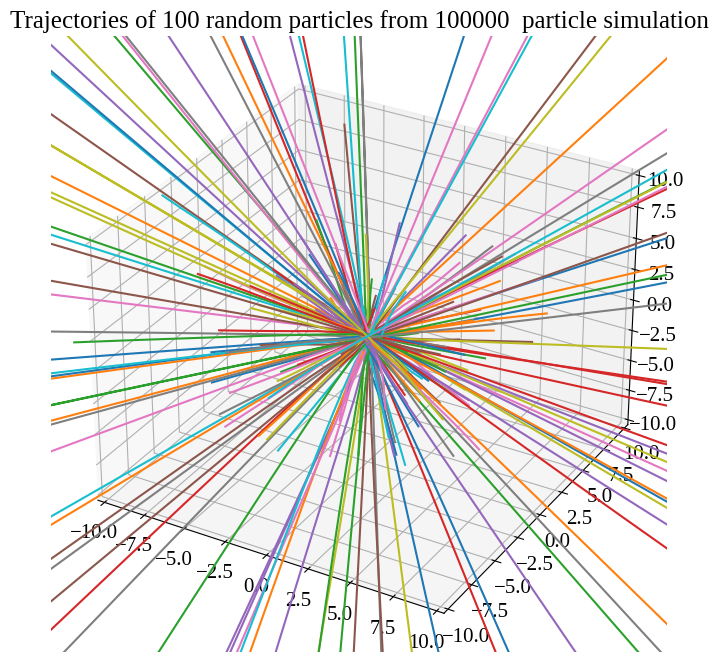

In [88]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection = '3d')

for i in index:
    ax.plot3D(x[i], y[i], z[i])

ax.axes.set_xlim3d(left=-10, right=10) 
ax.axes.set_ylim3d(bottom=-10, top=10) 
ax.axes.set_zlim3d(bottom=-10, top=10)
plt.title("Trajectories of %d random particles from %d  particle simulation" %(len(index),N_part))
#plt.savefig("trajectory_100000", format='pdf')
plt.show()

In [49]:
# animation

l=10

def update(num):
    ax.clear()
    for i in index:
        ax.scatter(x[i][num-1], y[i][num-1], z[i][num-1], color='black')

    ax.set_title(f'{len(index)} particles, time = {round(t[num],2)}')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_zlabel(r'$z$')
    
    ax.set_xlim(-l, l)
    ax.set_ylim(-l, l)
    ax.set_zlim(-l, l)
    

# Plotting the Animation
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set(aspect='equal')
line_ani = animation.FuncAnimation(fig, update, interval=1000,   
                                   frames=range(len(t)))

# Saving the Animation
f = r"sphere.gif"
writergif = animation.PillowWriter(fps=30)
#line_ani.save(f, writer=writergif)

plt.close()

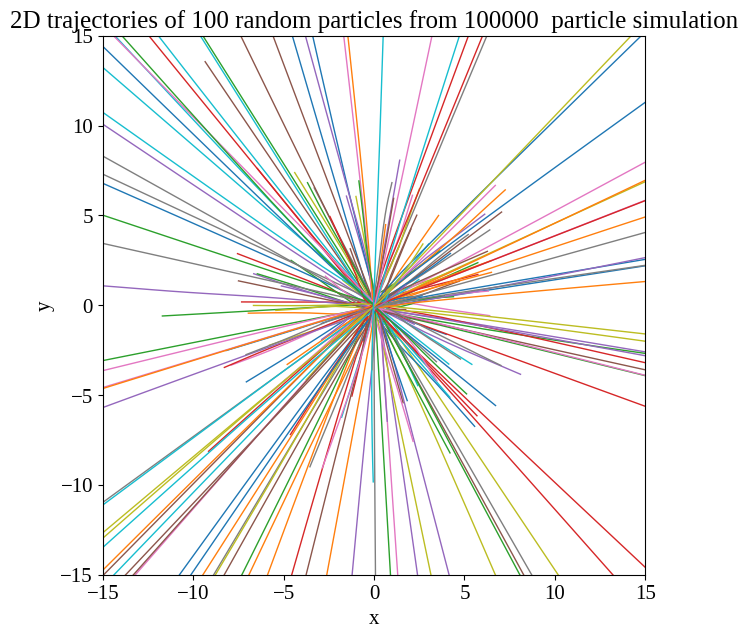

In [91]:
for i in range(N_part):
    plt.plot(x[i], y[i], lw=1)
    
plt.ylabel("y")
plt.xlabel("x")
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.title("2D trajectories of particles from %d  particle simulation" %N_part)
#plt.savefig("2D_trajectory_100", format='pdf')
plt.show()
plt.show()

for i in index:
    plt.plot(x[i], y[i], lw=1)
    
plt.ylabel("y")
plt.xlabel("x")
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.title("2D trajectories of %d random particles from %d  particle simulation" %(len(index),N_part))
#plt.savefig("2D_trajectory_100000", format='pdf')
plt.show()

## Radii of the particles
We considered the evolution of the distances from the centre of the particles, to verify the dynamical timescale of the system and to observe the presence of unbounded particles.

Let's first compute the dynamical time using the formula (G=1): $$T_{dyn}=\sqrt{\frac{3\pi}{16\rho_0}}$$
and the collapse time: $$T_{coll}=\sqrt{\frac{3\pi}{32\rho_0}}=\frac{T_{dyn}}{\sqrt{2}}$$

In [10]:
rho=3*N_part/(4 * np.pi * 10**3)
t_dyn=(3*np.pi/(16*rho))**(1/2)
t_coll=t_dyn/(2)**(1/2)

print("The dynamical timescale is: ", round(t_dyn,3))
print("The collapse timescale is: ", round(t_coll,3))

The dynamical timescale is:  0.157
The collapse timescale is:  0.111


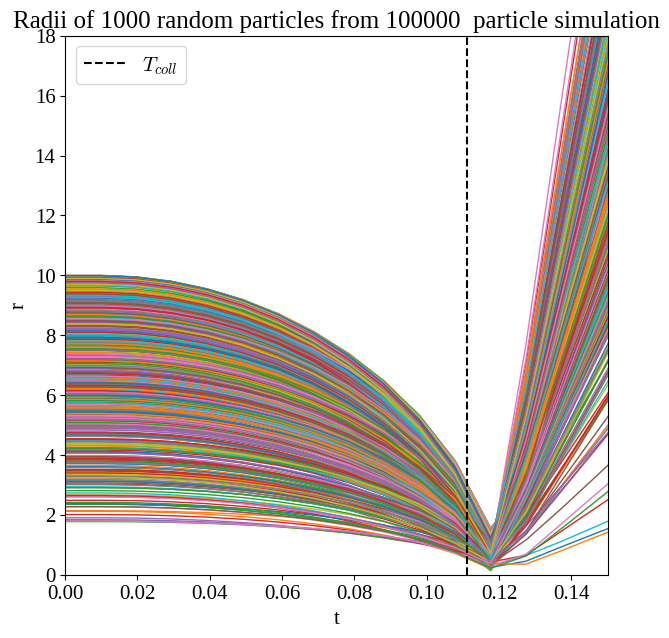

In [11]:
t=np.linspace(0, t[-1], int(N_snap))


for i in index:
    plt.plot(t, r[i], lw=1)

plt.ylabel("r")
plt.xlabel("t")
plt.xlim(0,0.15)
plt.ylim(0,18)
plt.title("Radii of %d random particles from %d  particle simulation" %(len(index),N_part))
plt.vlines(t_coll, 0, 18, ls='--', color='black', label='$T_{coll}$')
plt.legend()
#plt.savefig("radius_100000", format='pdf')
plt.show()

As it is possible to observe, all the particles get closer to the centre of the sphere nearly at the same time, independently on the initial distance.
After the collapse the bounded particles oscillate near the centre, while some particles, that gain enough energy, escape from the system.